In [90]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cars24com-used-cars-dataset/README.md
/kaggle/input/cars24com-used-cars-dataset/cars_24_combined.csv
/kaggle/input/cars24com-used-cars-dataset/Cars24_Scrapper.ipynb


In [91]:
df= pd.read_csv("/kaggle/input/cars24com-used-cars-dataset/cars_24_combined.csv")
df.head(10)

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000
5,5,Maruti Swift,2017.0,70129,1,PETROL,MH-14,Manual,HatchBack,552000
6,6,Hyundai i20,2012.0,103781,1,PETROL,NaN,Manual,HatchBack,278000
7,7,Renault Kwid,2021.0,31945,2,PETROL,UP-32,Automatic,HatchBack,518000
8,8,Hyundai Grand i10,2015.0,39950,1,PETROL,HR-26,Manual,HatchBack,443000
9,9,Maruti Swift,2018.0,56697,1,DIESEL,KA-04,Automatic,HatchBack,710350


In [105]:
df.dtypes

Unnamed: 0          int64
Distance            int64
Owner               int64
Price               int64
Unnamed: 0 Label    int64
Car Name Label      int64
Year Label          int64
Fuel Label          int64
Drive Label         int64
Type Label          int64
dtype: object

# ****Data description

In [92]:
df.describe()

,Unnamed: 0,Year,Distance,Owner,Price
count,8015.000000,8014.000000,8015.000000,8015.000000,8.015000e+03
mean,4007.000000,2016.995009,52621.411728,1.300187,5.748829e+05
std,2313.875537,2.861454,29182.922728,0.510893,2.651049e+05
min,0.000000,2010.000000,0.000000,1.000000,1.190000e+05
25%,2003.500000,2015.000000,30730.000000,1.000000,3.930000e+05
50%,4007.000000,2017.000000,50359.000000,1.000000,5.350000e+05
75%,6010.500000,2019.000000,71762.000000,2.000000,6.980000e+05
max,8014.000000,2023.000000,971212.000000,4.000000,3.300000e+06


# ****Missing values

In [93]:
df.isnull().sum()

Unnamed: 0      0
Car Name        1
Year            1
Distance        0
Owner           0
Fuel            0
Location      213
Drive           0
Type            0
Price           0
dtype: int64

In [94]:
corel=df.corr()
corel

,Unnamed: 0,Year,Distance,Owner,Price
Unnamed: 0,1.000000,-0.003654,-0.000674,0.019931,-0.006814
Year,-0.003654,1.000000,-0.371792,-0.212127,0.501978
Distance,-0.000674,-0.371792,1.000000,0.137670,-0.198950
Owner,0.019931,-0.212127,0.137670,1.000000,-0.149925
Price,-0.006814,0.501978,-0.198950,-0.149925,1.000000


# ****Correalation Of Columns

<Axes: >

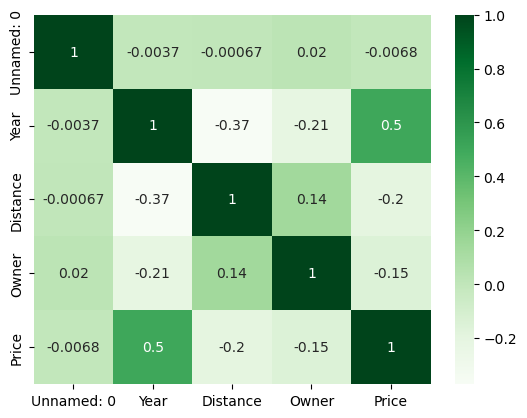

In [95]:
sns.heatmap(corel, annot=True, cmap="Greens")


# ****EDA

# Car Prices By Year

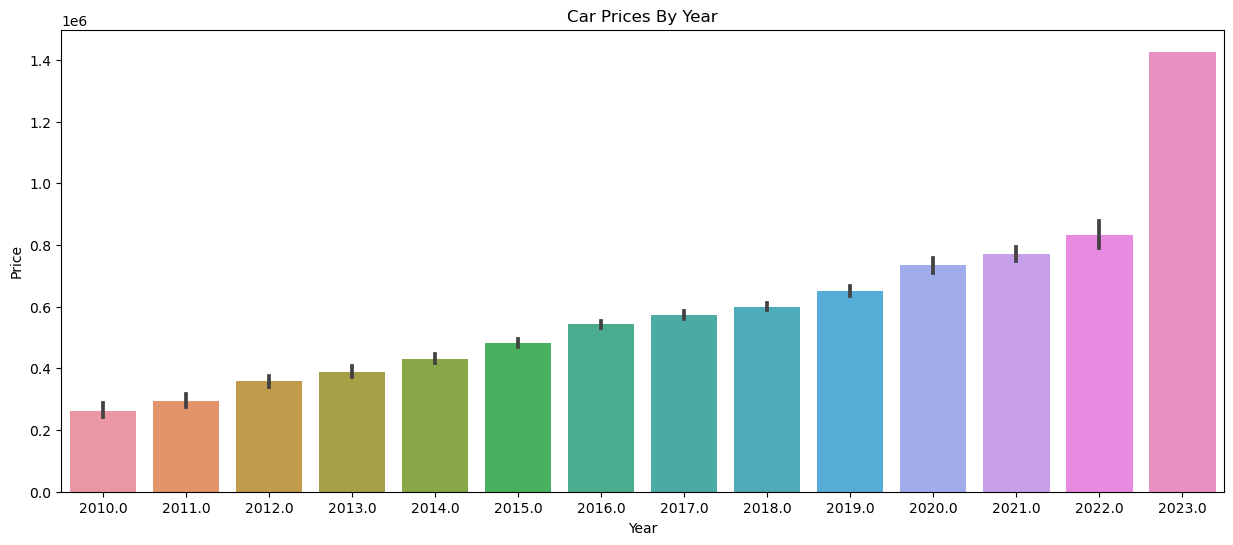

In [96]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df['Year'],y=df['Price'])
plt.title("Car Prices By Year")
plt.show()

In [97]:
df.dropna(inplace = True)

In [98]:
for i in df.columns.to_list():
    df[i+ ' Label'] = df[i].map(dict(zip(pd.Series(df[i].unique()), pd.Series([i for i in range(df[i].nunique())]))))

df.drop(['Car Name','Year','Fuel','Location','Location Label','Distance Label','Drive','Type', 'Owner Label','Price Label'], axis =1, inplace = True)

df
    

,Unnamed: 0,Distance,Owner,Price,Unnamed: 0 Label,Car Name Label,Year Label,Fuel Label,Drive Label,Type Label
0,0,3878,1,514000,0,0,0,0,0,0
1,1,32041,1,674000,1,1,1,0,0,1
2,2,96339,1,1952000,2,2,2,1,1,2
3,3,51718,1,690000,3,3,3,1,0,2
4,4,19811,1,526000,4,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8010,8010,11500,1,292000,7796,19,1,0,0,0
8011,8011,73393,2,534000,7797,38,1,0,0,1
8012,8012,83810,2,424000,7798,52,7,0,0,1
8013,8013,39162,1,685000,7799,30,3,0,1,0


In [99]:
X  = df.drop(['Price'], axis =1)
y = df['Price']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)

In [101]:
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [103]:

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 33126624951.00


In [104]:

model.score(X_test, y_test)

0.500069883412752

In [106]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators= 1000)

model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [107]:

model.score(X_test, y_test)

0.781973543136659